# Spam Mail Prediction

In [76]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [77]:
#reading dataset
raw_dataset=pd.read_csv('mail_data.csv')

In [78]:
raw_dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [79]:
#checking for null value
raw_dataset.isnull().sum()

Category    0
Message     0
dtype: int64

In [80]:
#replacing null value with empty string(2_step)
mail_dataset=raw_dataset.fillna('')

In [81]:
mail_dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [82]:
sns.set()

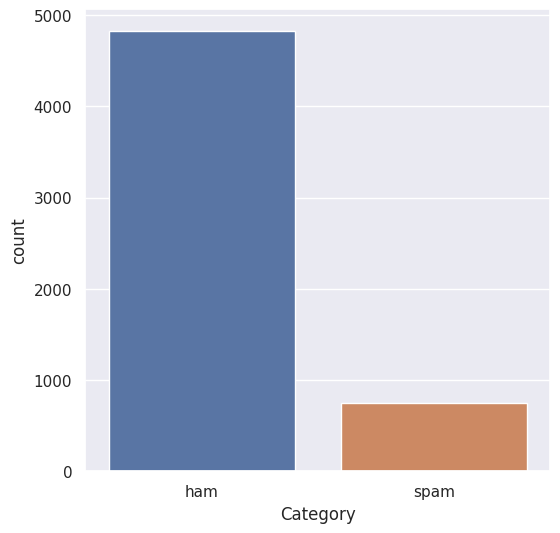

In [83]:
#Visualizing the mail category in dataset
plt.figure(figsize=(6,6))
sns.countplot(x='Category',data=mail_dataset)
plt.show()

In [84]:
#replacing the categorical text data to numerical data
mail_dataset.replace({'Category':{'ham':0,'spam':1}},inplace=True)

In [85]:
mail_dataset.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [86]:
#Seperating feature and dependent or target variable
x=mail_dataset['Message']
y=mail_dataset['Category']

In [87]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [88]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64


In [89]:
#aplitting the dataset for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [90]:
print(x.shape)

(5572,)


In [91]:
print(x_train.shape)

(4457,)


In [92]:
print(x_test.shape)

(1115,)


In [93]:
#converting Text to numerical values
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
x_train_features=feature_extraction.fit_transform(x_train)
x_test_features=feature_extraction.transform(x_test)

In [94]:
print(x_train_features)

  (0, 3422)	0.6418008618863358
  (0, 3960)	0.40459749284424307
  (0, 4776)	0.2937599690543961
  (0, 4486)	0.4933198981059812
  (0, 3101)	0.30778739607068667
  (1, 3855)	0.4410710256765374
  (1, 4574)	0.4410710256765374
  (1, 2534)	0.4410710256765374
  (1, 814)	0.4410710256765374
  (1, 4555)	0.4205367990464199
  (1, 2902)	0.2120712188920981
  (2, 3398)	0.5133141633463273
  (2, 1317)	0.34462014146959175
  (2, 432)	0.4077104256374456
  (2, 4294)	0.36445133334144264
  (2, 2503)	0.5133141633463273
  (2, 4776)	0.2349500626979615
  (3, 1138)	0.6489221209014988
  (3, 1160)	0.44843330753299465
  (3, 3378)	0.38536596088088965
  (3, 3118)	0.3618113574629584
  (3, 3778)	0.31367701143832527
  (4, 3805)	1.0
  (5, 3731)	0.6020708068994186
  (5, 7381)	0.7984426989330436
  :	:
  (4454, 348)	0.2816333253882664
  (4454, 110)	0.3000941484572203
  (4454, 2067)	0.25658354936739225
  (4454, 4488)	0.3000941484572203
  (4454, 651)	0.3000941484572203
  (4454, 373)	0.23959800001827322
  (4454, 796)	0.28163332538

In [95]:
print(x_test_features)

  (0, 7478)	0.11238527640544621
  (0, 7420)	0.19398477272351503
  (0, 7260)	0.14384114349719565
  (0, 6602)	0.19398477272351503
  (0, 6350)	0.19398477272351503
  (0, 5782)	0.11386086683184304
  (0, 5452)	0.13293730388210073
  (0, 5038)	0.19398477272351503
  (0, 5014)	0.13293730388210073
  (0, 4496)	0.1102105484474495
  (0, 4466)	0.16951508500886583
  (0, 4302)	0.17357598220109133
  (0, 4250)	0.19398477272351503
  (0, 4004)	0.17357598220109133
  (0, 3867)	0.3120289176577842
  (0, 3630)	0.19398477272351503
  (0, 3310)	0.3946343133427287
  (0, 3136)	0.19398477272351503
  (0, 3060)	0.38796954544703005
  (0, 3059)	0.2772755538586351
  (0, 2114)	0.1302342007925869
  (0, 1493)	0.1368549641200954
  (0, 524)	0.19398477272351503
  (1, 7163)	0.4130504232751816
  (1, 7014)	0.39097385770203663
  :	:
  (1109, 2086)	0.3511723226114505
  (1110, 6677)	0.278010885413778
  (1110, 6020)	0.35653930858248284
  (1110, 5001)	0.39666689104890435
  (1110, 3863)	0.2030867005199339
  (1110, 3207)	0.36236761338841

In [96]:
#Training and Predicting our Logistic Regression model
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train_features,y_train)
y_pred=classifier.predict(x_test_features)
print(y_pred)

[0 0 0 ... 0 0 0]


In [97]:
#Evaluating the result
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[954   1]
 [ 36 124]]
0.9668161434977578


In [98]:
#Real time prediction
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = classifier.predict(input_data_features)
print(prediction)


if (prediction[0]==0):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Ham mail
